In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np

# import tensorflow and MNIST dataset under the Keras API
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train and x_test parts contain greyscale RGB codes (from 0 to 255)
# y_train and y_test parts contains labels from 0 to 9

8


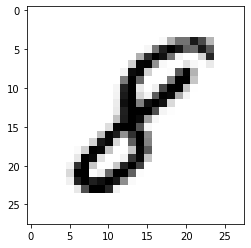

In [96]:
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [97]:
x_train.shape

(60000, 28, 28)

In [98]:
# Reshaping and Normalizing the Images
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [99]:
# adding noise to data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [100]:
# Creating a Sequential Model and adding the layers
model = Sequential()
# Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# Max pooling operation for 2D spatial data. Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. 
model.add(MaxPooling2D(pool_size=(2, 2)))
# latten layer collapses the spatial dimensions of the input into the channel dimension
model.add(Flatten()) 
# Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase
# dense layer is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [101]:
# optimize with a given loss function which uses a metric.Then fit the model by using train data
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train_noisy,y_train, epochs=20, batch_size=32, verbose=1,validation_data=(x_test_noisy, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 372us/sample - loss: 0.5622 - acc: 0.8203 - val_loss: 0.2850 - val_acc: 0.9131
Epoch 2/20
60000/60000 [==============================] - 24s 396us/sample - loss: 0.2833 - acc: 0.9103 - val_loss: 0.2221 - val_acc: 0.9285
Epoch 3/20
60000/60000 [==============================] - 24s 405us/sample - loss: 0.1971 - acc: 0.9368 - val_loss: 0.2102 - val_acc: 0.9341 0.1974 - acc: 0.
Epoch 4/20
60000/60000 [==============================] - 23s 385us/sample - loss: 0.1430 - acc: 0.9529 - val_loss: 0.2176 - val_acc: 0.9341
Epoch 5/20
60000/60000 [==============================] - 23s 379us/sample - loss: 0.1060 - acc: 0.9646 - val_loss: 0.2434 - val_acc: 0.9315
Epoch 6/20
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0848 - acc: 0.9706 - val_loss: 0.2523 - val_acc: 0.9353
Epoch 7/20
60000/60000 [==============================] - 24s 395us/sample - loss: 0.07

10000/10000 [==============================] - 1s 123us/sample - loss: 0.4663 - acc: 0.9251
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


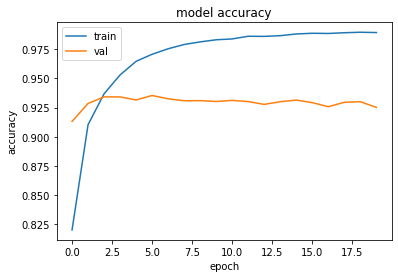

In [102]:
model.evaluate(x_test_noisy, y_test)
model.save('ML2_Assignment2.h5')

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

C:\Users\Loch Maya\Anaconda2\envs\mypython3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7
5


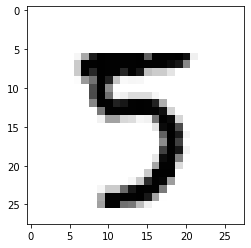

In [103]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

image_index = load_image('sample_image1.png')
pred = model.predict(image_index)
print(pred.argmax())

image_index = 4440
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
